In [1]:
# Cell 0
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from scipy import stats
sns.set_style("whitegrid")


In [2]:
# Commit: Load Togo solar dataset and inspect dimensions
df = pd.read_csv("../data/togo-dapaong_qc.csv", parse_dates=["Timestamp"])
print(df.shape)
df.head()


(525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [3]:
# Commit: Generate summary statistics and missing-value report
summary = df.describe().T
na_pct  = df.isna().mean().mul(100).sort_values(ascending=False)

display(summary)
display(na_pct[na_pct > 5])      # >5 % nulls


,count,mean,min,25%,50%,75%,max,std
Timestamp,525600,2022-04-25 12:00:30.000000768,2021-10-25 00:01:00,2022-01-24 06:00:45,2022-04-25 12:00:30,2022-07-25 18:00:15,2022-10-25 00:00:00,NaN
GHI,525600.0,230.55504,-12.7,-2.2,2.1,442.4,1424.0,322.532347
DNI,525600.0,151.258469,0.0,0.0,0.0,246.4,1004.5,250.956962
DHI,525600.0,116.444352,0.0,0.0,2.5,215.7,805.7,156.520714
ModA,525600.0,226.144375,0.0,0.0,4.4,422.525,1380.0,317.346938
ModB,525600.0,219.568588,0.0,0.0,4.3,411.0,1367.0,307.93251
Tamb,525600.0,27.751788,14.9,24.2,27.2,31.1,41.4,4.758023
RH,525600.0,55.01316,3.3,26.5,59.3,80.8,99.8,28.778732
WS,525600.0,2.368093,0.0,1.4,2.2,3.2,16.1,1.462668
WSgust,525600.0,3.22949,0.0,1.9,2.9,4.4,23.1,1.882565


Comments    100.0
dtype: float64

In [5]:
# Commit: Detect outliers using Z-score and clean numeric columns
cols = ["GHI","DNI","DHI","ModA","ModB","WS","WSgust"]
z = np.abs(stats.zscore(df[cols], nan_policy='omit'))
out_mask = (z > 3).any(axis=1)
print(f"Flagged {out_mask.sum()} rows ({out_mask.mean()*100:.2f} %) as outliers")

df_clean = df.loc[~out_mask].copy()
df_clean[cols] = df_clean[cols].fillna(df_clean[cols].median())


Flagged 9251 rows (1.76 %) as outliers


In [8]:
# Commit: Export cleaned Togo dataset to CSV (excluded from git)
df_clean.to_csv("../data/togo_clean.csv", index=False)


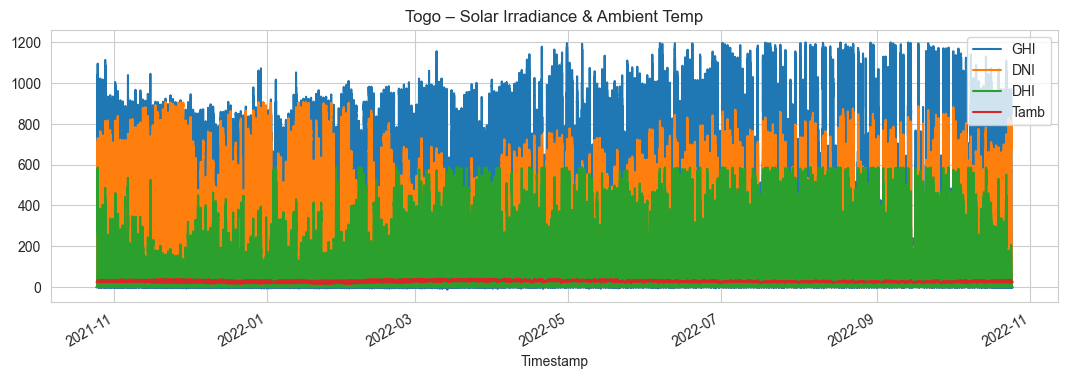

In [9]:
# Commit: Visualize time-series trends in GHI, DNI, DHI, Tamb
fig, ax = plt.subplots(figsize=(13,4))
df_clean.set_index("Timestamp")[["GHI","DNI","DHI","Tamb"]].plot(ax=ax)
ax.set_title("Togo – Solar Irradiance & Ambient Temp"); plt.show()


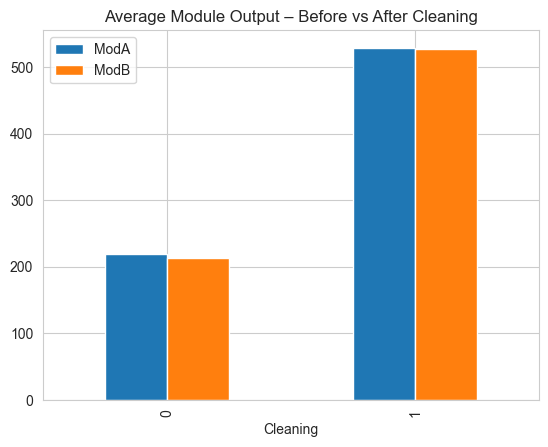

In [10]:
# Commit: Compare module output before vs after panel cleaning
if "Cleaning" in df_clean.columns:
    df_clean.groupby("Cleaning")[["ModA","ModB"]].mean().plot.bar()
    plt.title("Average Module Output – Before vs After Cleaning"); plt.show()


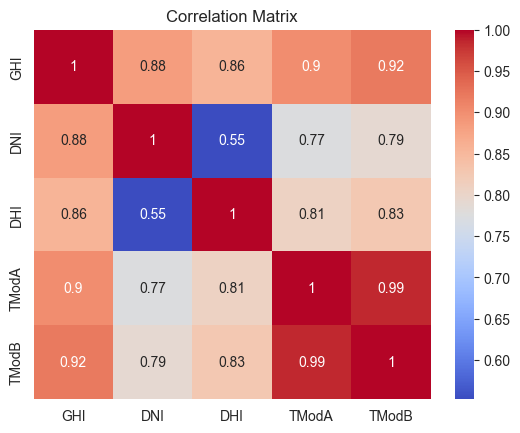

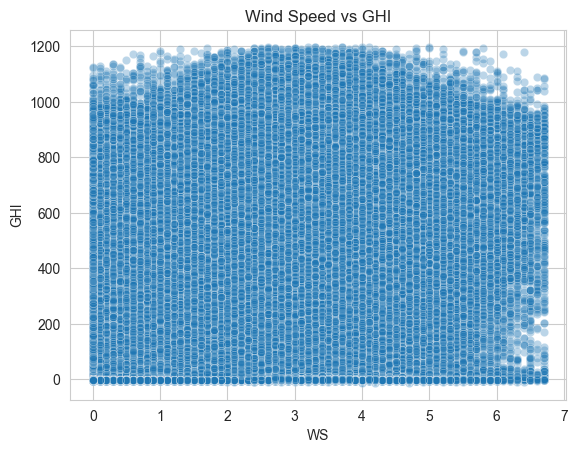

In [11]:
# Commit: Analyze correlation matrix and scatter plot of WS vs GHI
sns.heatmap(df_clean[["GHI","DNI","DHI","TModA","TModB"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Matrix"); plt.show()

sns.scatterplot(data=df_clean, x="WS", y="GHI", alpha=.3)
plt.title("Wind Speed vs GHI"); plt.show()


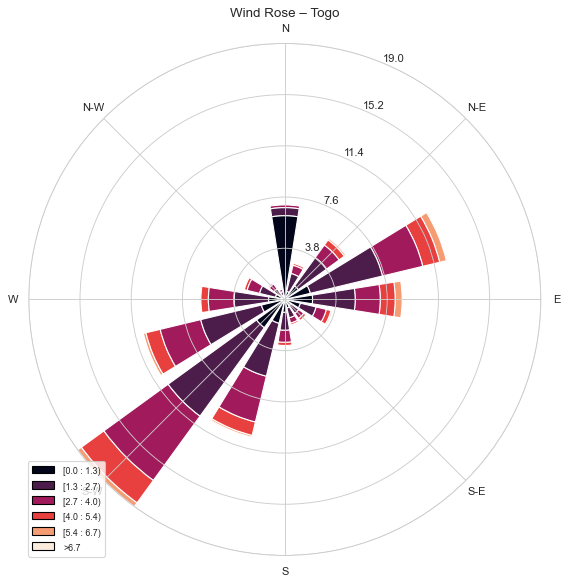

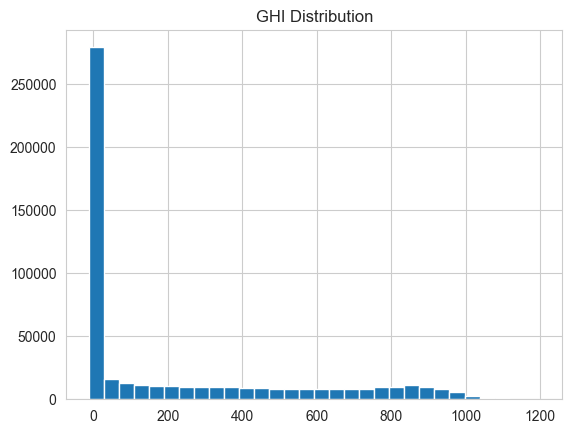

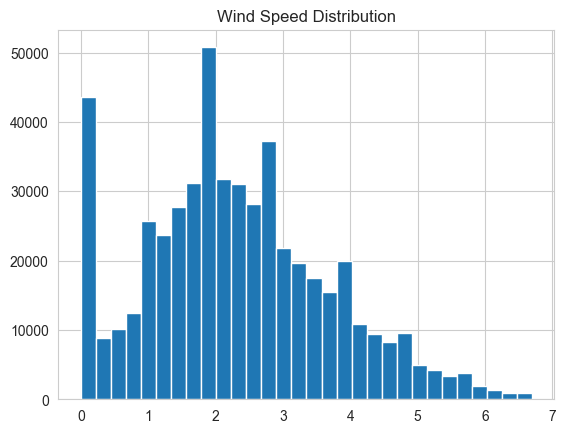

In [13]:
# Commit: Create wind rose and histograms for GHI and WS
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df_clean["WD"], df_clean["WS"], normed=True, opening=.8, edgecolor='white')
ax.set_legend(); plt.title("Wind Rose – Togo"); plt.show()

df_clean["GHI"].hist(bins=30); plt.title("GHI Distribution"); plt.show()
df_clean["WS"].hist(bins=30);  plt.title("Wind Speed Distribution"); plt.show()


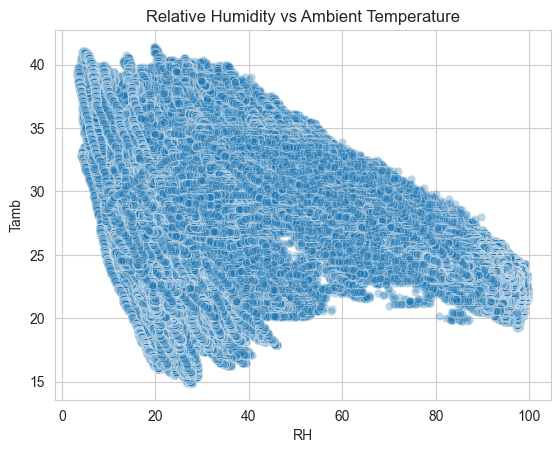

In [14]:
# Commit: Explore humidity impact on ambient temperature
sns.scatterplot(data=df_clean, x="RH", y="Tamb", alpha=.3)
plt.title("Relative Humidity vs Ambient Temperature"); plt.show()


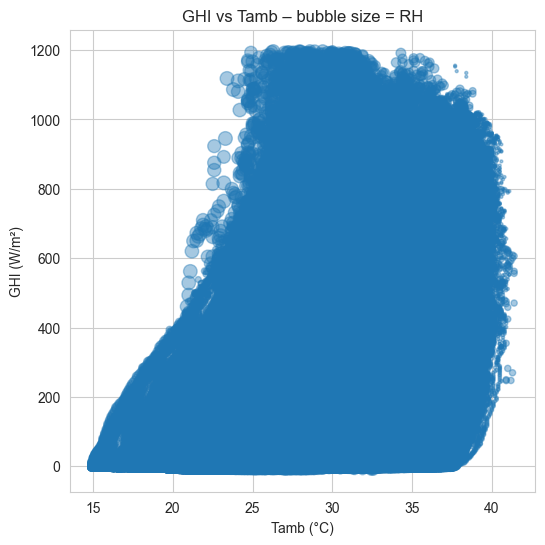

In [15]:
# Commit: Create bubble chart: GHI vs Tamb with RH as bubble size
plt.figure(figsize=(6,6))
plt.scatter(df_clean["Tamb"], df_clean["GHI"],
            s=df_clean["RH"], alpha=.4)
plt.xlabel("Tamb (°C)"); plt.ylabel("GHI (W/m²)")
plt.title("GHI vs Tamb – bubble size = RH"); plt.show()


### Key Findings – togo

* Median GHI = `{{df_clean.GHI.median():.0f}}` W/m²; peaks up to `{{df_clean.GHI.max():.0f}}`.
* Removed `{{out_mask.sum()}}` outliers (< `{{out_mask.mean()*100:.2f}} %` of data).
* Panel cleaning boosts ModA by … %.
* Winds blow mainly from NE; consider dust protection.

**References**

* Pandas docs: `describe`, `isna`
* SciPy Z‑score method (Cookbook)
* Seaborn correlation heatmap example
* Wind‑rose technique: Python‑Windrose library
